In [1]:
from astropy.io import fits
import astropy.constants as c
import astropy.units as u
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import re

In [2]:
import util

In [3]:
dirname = '20240504'

In [4]:
fpaths = glob.glob(f'{dirname}/*.fits')
print(fpaths)

['20240504/red0018.fits', '20240504/blue0016.fits', '20240504/red0022.fits', '20240504/red0002.fits', '20240504/red0014.fits', '20240504/blue0020.fits', '20240504/blue0021.fits', '20240504/red0015.fits', '20240504/red0003.fits', '20240504/red0023.fits', '20240504/blue0017.fits', '20240504/red0019.fits', '20240504/blue0001.fits', '20240504/red0004.fits', '20240504/red0012.fits', '20240504/blue0026.fits', '20240504/blue0006.fits', '20240504/red0008.fits', '20240504/blue0010.fits', '20240504/red0024.fits', '20240504/red0025.fits', '20240504/blue0011.fits', '20240504/red0009.fits', '20240504/blue0007.fits', '20240504/blue0027.fits', '20240504/red0013.fits', '20240504/red0005.fits', '20240504/blue0024.fits', '20240504/red0010.fits', '20240504/red0006.fits', '20240504/blue0008.fits', '20240504/red0026.fits', '20240504/blue0028.fits', '20240504/blue0012.fits', '20240504/blue0004.fits', '20240504/blue0005.fits', '20240504/blue0013.fits', '20240504/red0027.fits', '20240504/blue0009.fits', '2024

In [5]:
with fits.open('20240504/red0018.fits') as hdul:
    hdul_r18 = hdul
hdul_r18[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 4141 / length of data axis 1                          
NAXIS2  =                  440 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format defined in Astronomy and
COMMENT   Astrophysics Supplement Series v44/p363, v44/p371, v73/p359, v73/p365.
COMMENT   Contact the NASA Science Office of Standards and Technology for the   
COMMENT   FITS Definition document #100 and other FITS information.             
BZERO   =                32768 / offset data range to that of unsigned short    
BSCALE  =                    1 / default scaling factor                         
OBJECT  = 'none    '        

In [6]:
with fits.open('20240504/blue0018.fits') as hdul:
    hdul_b18 = hdul
hdul_b18[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                  460 / length of data axis 1                          
NAXIS2  =                 2835 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format defined in Astronomy and
COMMENT   Astrophysics Supplement Series v44/p363, v44/p371, v73/p359, v73/p365.
COMMENT   Contact the NASA Science Office of Standards and Technology for the   
COMMENT   FITS Definition document #100 and other FITS information.             
BZERO   =                32768 / offset data range to that of unsigned short    
BSCALE  =                    1 / default scaling factor                         
OBJECT  = 'none    '        

In [7]:
hdr_keys = ['OBJECT', 'IMGTYPE', 'GAIN', 'EXPTIME', 'UT', 'RA', 'DEC', 'AIRMASS', 'GRATING']

In [8]:
hdr_data = []
data = {}
for fpath in fpaths:
    with fits.open(fpath) as hdul:
        k = re.split(r'/|\.', fpath)[1]
        hdr = hdul[0].header
        hdr_data.append([hdr.get(k, None)  for k in hdr_keys])
        data[k] = hdul[0].data.astype(float)

In [9]:
len(data)

55

In [10]:
hdr_df = pd.DataFrame(hdr_data, columns=hdr_keys, index=[re.split(r'/|\.', fpath)[1] for fpath in fpaths])
hdr_df.index.name = 'filename'
hdr_df.sort_index()

OBJECT IMGTYPE  GAIN  EXPTIME          UT           RA  \
filename                                                              
blue0001               bias  0.72      0.0  23:16:52.6  06:17:13.70   
blue0002               bias  0.72      0.0  23:17:14.3  06:17:35.45   
blue0003               bias  0.72      0.0  23:17:35.9  06:17:57.11   
blue0004               bias  0.72      0.0  23:17:57.6  06:18:18.89   
blue0005               bias  0.72      0.0  23:18:19.3  06:18:40.64   
blue0006               bias  0.72      0.0  23:18:41.0  06:19:02.40   
blue0007               bias  0.72      0.0  23:19:02.7  06:19:24.16   
blue0008               bias  0.72      0.0  23:19:24.3  06:19:45.80   
blue0009               bias  0.72      0.0  23:19:46.0  06:20:07.57   
blue0010               bias  0.72      0.0  23:20:07.7  06:20:29.33   
blue0011               bias  0.72      0.0  23:20:29.4  06:20:51.08   
blue0012      fe-ar     cal  0.72     30.0  23:28:13.4  06:28:36.39   
blue0013      fe-ar     cal  0.72     30.0  23:29:05.1  06:29:28.24   
blue0014      fe-ar     cal  0.72     30.0  23:29:56.7  06:30:19.97   
blue0015      fe-ar     cal  0.72     30.0  23:30:48.4  06:31:11.83   
blue0016      fe-ar     cal  0.72     30.0  23:31:40.1  06:32:03.67   
blue0017       none    flat  0.72     80.0  23:36:37.1  06:37:01.52   
blue0018       none    flat  0.72     80.0  23:39:19.9  06:39:44.78   
blue0019       none    flat  0.72     80.0  23:41:01.6  06:41:26.79   
blue0020       none    flat  0.72     80.0  23:42:43.2  06:43:08.68   
blue0021       none    flat  0.72     80.0  23:44:24.9  06:44:50.67   
blue0022  SN2024eze  object  0.72   1200.0  03:50:23.6  16:59:05.82   
blue0023  SN2024eze  object  0.72   1200.0  04:10:54.6  16:59:05.86   
blue0024  HD 158261  object  0.72     10.0  04:37:28.9  17:26:44.66   
blue0025  HD 158261  object  0.72      5.0  04:38:50.2  17:26:44.73   
blue0026  HD 158261  object  0.72      1.0  04:40:41.6  17:26:44.71   
blue0027  HD 158261  object  0.72      0.5  04:44:02.0  17:26:44.70   
blue0028  HD 158261  object  0.72      0.5  04:44:24.2  17:26:44.68   
red0001                bias  2.80      0.0  23:16:56.4  06:17:17.50   
red0002                bias  2.80      0.0  23:17:19.5  06:17:40.67   
red0003                bias  2.80      0.0  23:17:42.7  06:18:03.94   
red0004                bias  2.80      0.0  23:18:05.8  06:18:27.10   
red0005                bias  2.80      0.0  23:18:29.0  06:18:50.36   
red0006                bias  2.80      0.0  23:18:52.1  06:19:13.54   
red0007                bias  2.80      0.0  23:19:15.3  06:19:36.79   
red0008                bias  2.80      0.0  23:19:38.4  06:19:59.95   
red0009                bias  2.80      0.0  23:20:01.6  06:20:23.22   
red0010                bias  2.80      0.0  23:20:24.7  06:20:46.38   
red0011                bias  2.80      0.0  23:20:47.8  06:21:09.55   
red0012   he  ne ar     cal  2.80      0.5  23:23:59.6  06:24:21.87   
red0013   he  ne ar     cal  2.80      0.5  23:24:23.3  06:24:45.64   
red0014   he  ne ar     cal  2.80      0.5  23:24:46.9  06:25:09.31   
red0015   he  ne ar     cal  2.80      0.5  23:25:10.6  06:25:33.09   
red0016   he  ne ar     cal  2.80      0.5  23:25:34.2  06:25:56.73   
red0017        none    flat  2.80     50.0  23:37:52.5  06:38:17.14   
red0018        none    flat  2.80     50.0  23:40:04.3  06:40:29.32   
red0019        none    flat  2.80     50.0  23:41:17.5  06:41:42.73   
red0020        none    flat  2.80     50.0  23:42:30.6  06:42:56.05   
red0021        none    flat  2.80     50.0  23:43:43.8  06:44:09.46   
red0022        none  object  2.80    600.0  03:49:20.9  16:59:05.87   
red0023   SN2024eze  object  2.80    600.0  04:01:01.1  16:59:05.80   
red0024   SN2024eze  object  2.80    600.0  04:11:24.3  16:59:05.90   
red0025   SN2024eze  object  2.80    600.0  04:21:47.4  16:59:05.93   
red0026   HD 158261  object  2.80      3.0  04:39:22.2  17:26:44.73   
red0027   HD 158261  object  2.80    

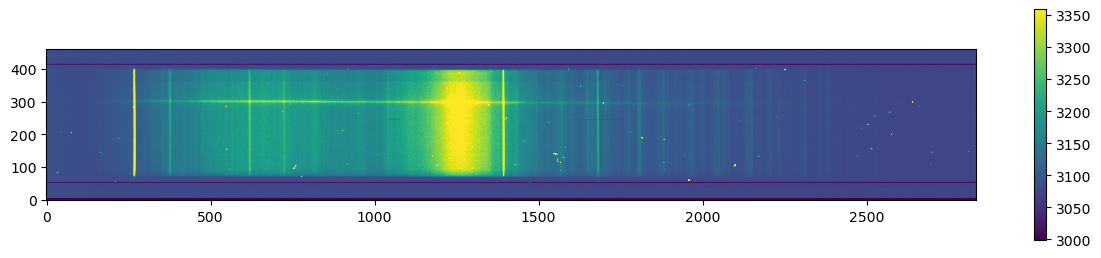

In [11]:
plt.figure(figsize=(15,3))
plt.imshow(data['blue0023'].T, origin='lower', clim=np.percentile(data['blue0023'].T, (1,99)))
plt.colorbar()

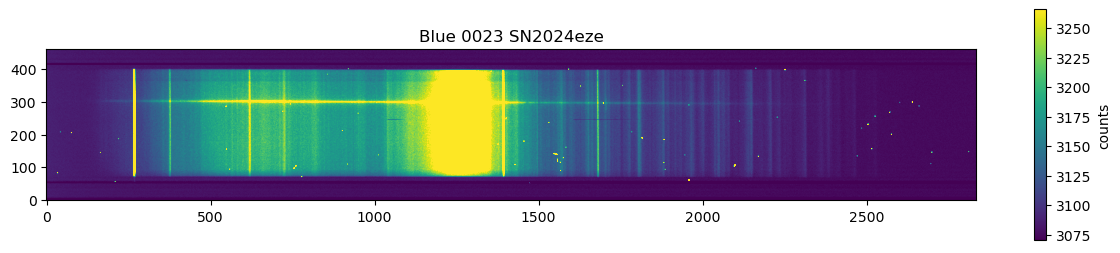

In [12]:
util.plot_frame(data['blue0023'].T, label='counts', title='Blue 0023 SN2024eze', prange=(5,95))

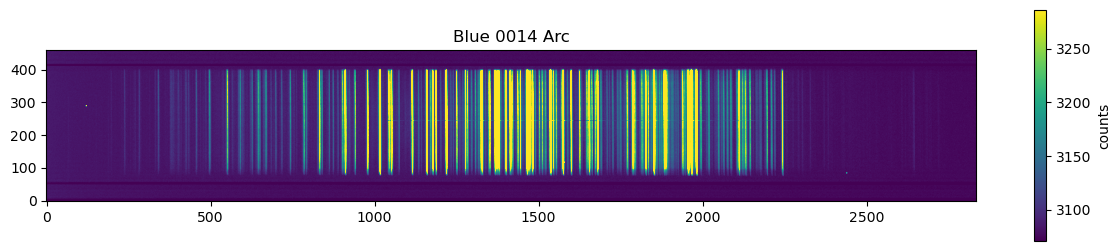

In [13]:
util.plot_frame(data['blue0014'].T, label='counts', title='Blue 0014 Arc', prange=(5,95))

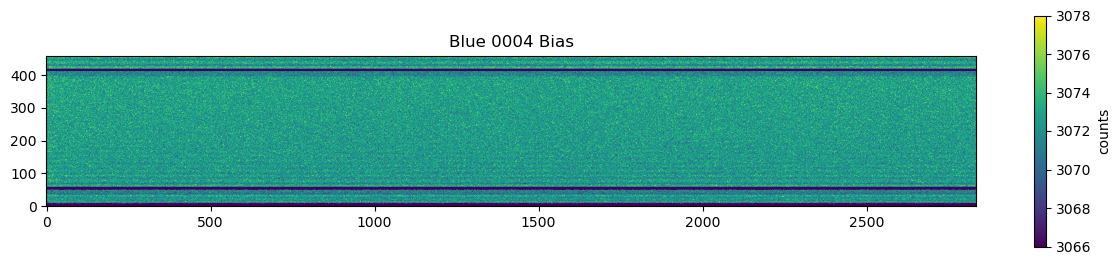

In [14]:
util.plot_frame(data['blue0004'].T, label='counts', title='Blue 0004 Bias', prange=(5,95))

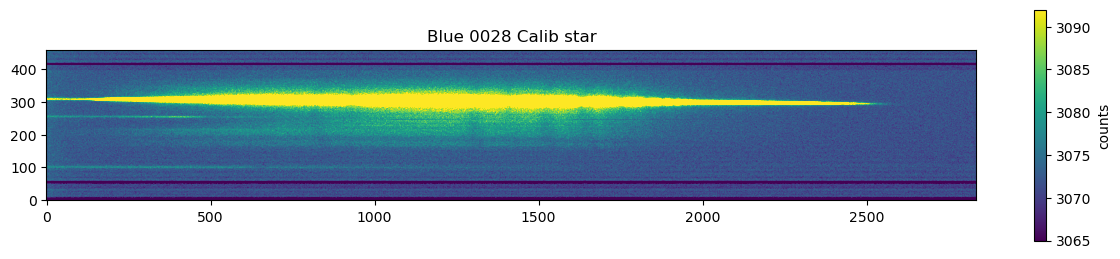

In [15]:
util.plot_frame(data['blue0028'].T, label='counts', title='Blue 0028 Calib star', prange=(5,95))

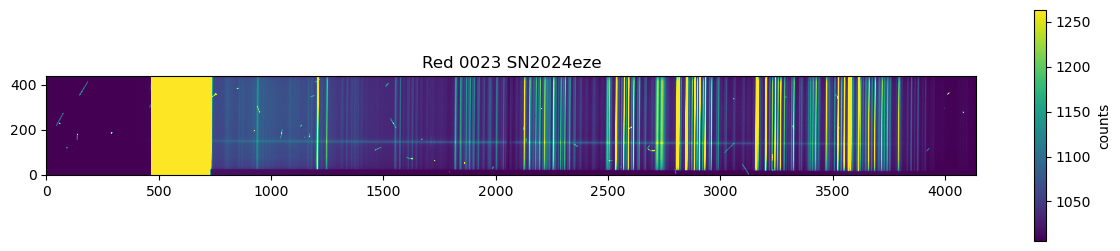

In [16]:
util.plot_frame(data['red0023'], label='counts', title='Red 0023 SN2024eze', prange=(10, 90))

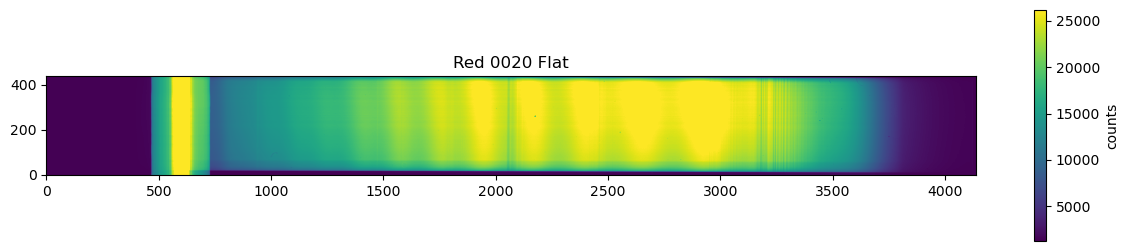

In [17]:
util.plot_frame(data['red0020'], label='counts', title='Red 0020 Flat', prange=(10, 90))

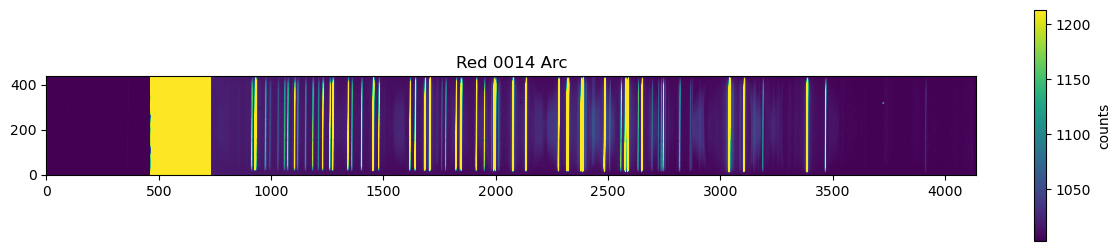

In [18]:
util.plot_frame(data['red0014'], label='counts', title='Red 0014 Arc', prange=(10, 90))

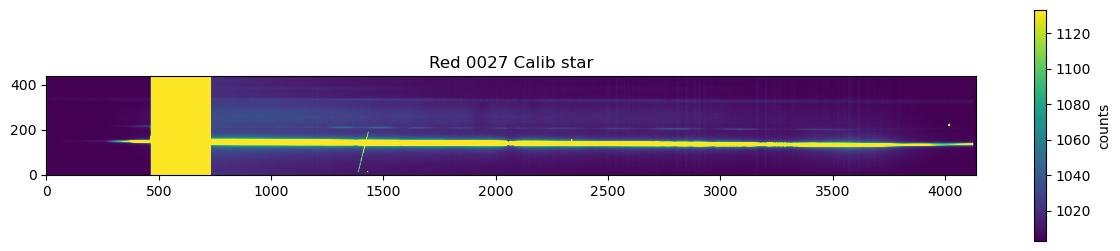

In [19]:
util.plot_frame(data['red0027'], label='counts', title='Red 0027 Calib star', prange=(10, 90))

## Prepare master frames
- for flat, bias, arc (denoted as cal in IMGTYPE), calib star

In [20]:
red_shape = data['red0001'].shape
blue_shape = data['blue0001'].shape

red_shape,blue_shape

((440, 4141), (2835, 460))

In [71]:
bias = hdr_df[hdr_df['IMGTYPE'] == 'bias']
flats = hdr_df[hdr_df['IMGTYPE'] == 'flat']
arcs = hdr_df[hdr_df['IMGTYPE'] == 'cal']
calib_star = hdr_df[(hdr_df['IMGTYPE'] == 'object') & (hdr_df['OBJECT'] == 'HD 158261')]

In [72]:
#remove saturated frames for blue calib star
calib_star.drop(calib_star.loc[(calib_star.index.str.contains('blue')) & (calib_star['EXPTIME'] > 0.5)].index, inplace=True)
calib_star

/var/folders/v9/2dzh8dk57glf4lxq5vv50sdm0005p2/T/ipykernel_75701/2657487585.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calib_star.drop(calib_star.loc[(calib_star.index.str.contains('blue')) & (calib_star['EXPTIME'] > 0.5)].index, inplace=True)


OBJECT IMGTYPE  GAIN  EXPTIME          UT           RA  \
filename                                                              
blue0027  HD 158261  object  0.72      0.5  04:44:02.0  17:26:44.70   
red0026   HD 158261  object  2.80      3.0  04:39:22.2  17:26:44.73   
blue0028  HD 158261  object  0.72      0.5  04:44:24.2  17:26:44.68   
red0027   HD 158261  object  2.80      3.0  04:39:48.3  17:26:44.69   

                  DEC AIRMASS   GRATING  
filename                                 
blue0027  +34:41:49.3   2.685  600/4000  
red0026   +34:41:49.1   2.789  316/7500  
blue0028  +34:41:49.5   2.677  600/4000  
red0027   +34:41:49.3   2.779  316/7500

### Master bias (red)

In [87]:
def create_master(frame, color, bias=None):
    frame_filtered = frame[np.char.startswith(list(frame.index), color)]
    shape = red_shape if color=='red' else blue_shape
    layers = np.zeros((shape[0], shape[1], frame_filtered.shape[0]))
    for i, curr_file in enumerate(frame_filtered.index):
        curr_data = data[curr_file]
        if bias is not None:
            texp = frame_filtered.loc[curr_file, 'EXPTIME']
            curr_data = (curr_data - bias) / texp
        layers[:, :, i] = curr_data

    master = np.median(layers, axis=2)
    return master


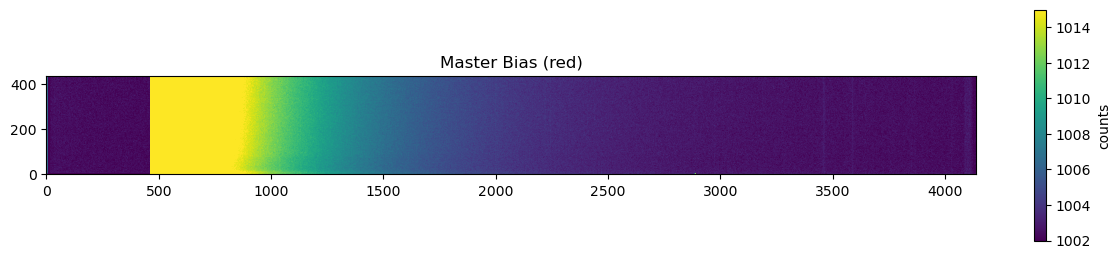

In [88]:
master_bias_red = create_master(bias, 'red')
util.plot_frame(master_bias_red, label='counts', title='Master Bias (red)', prange=(10, 90))

### Master bias (blue)

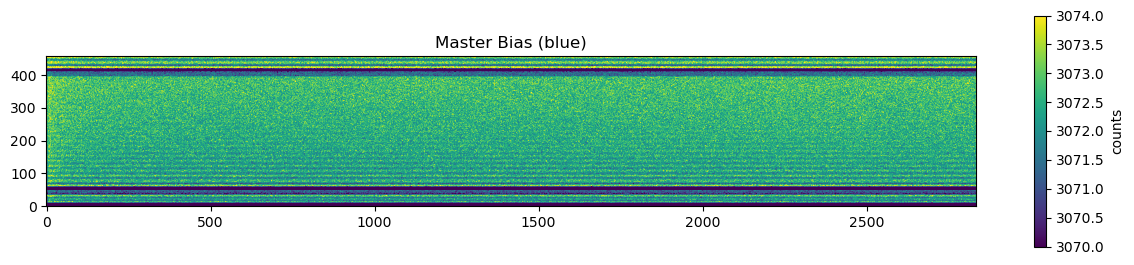

In [89]:
master_bias_blue = create_master(bias, 'blue')
util.plot_frame(master_bias_blue.T, label='counts', title='Master Bias (blue)', prange=(10, 90))

### Master flat (red)

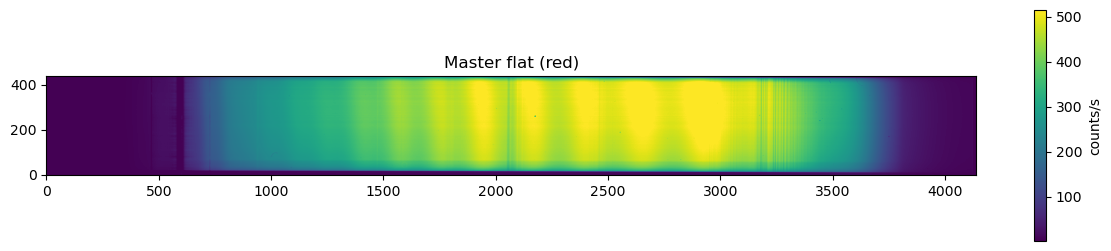

In [90]:
master_flat_red = create_master(flats, 'red', master_bias_red)
util.plot_frame(master_flat_red, label='counts/s', title='Master flat (red)', prange=(5, 95))

### Master flat (blue)

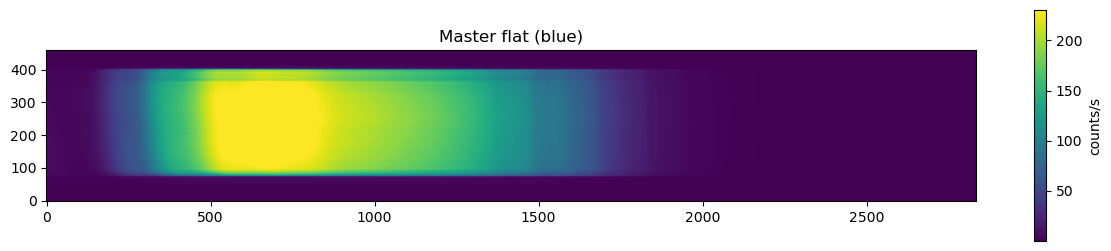

In [91]:
master_flat_blue= create_master(flats, 'blue', master_bias_blue)
util.plot_frame(master_flat_blue.T, label='counts/s', title='Master flat (blue)', prange=(5, 95))

### Master arc (red)

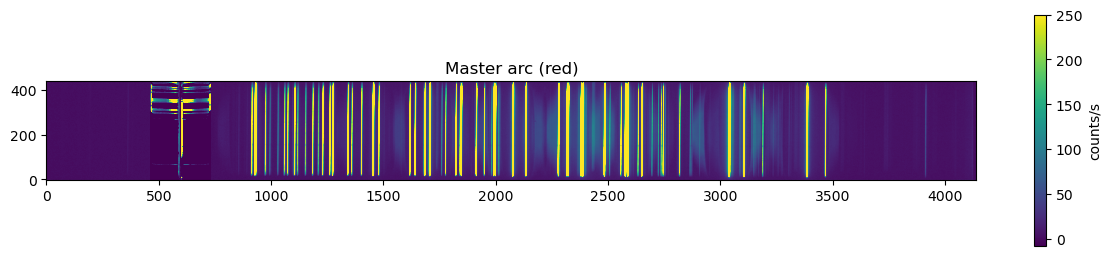

In [27]:
master_arc_red = create_master(arcs, 'red', master_bias_red)
util.plot_frame(master_arc_red, label='counts/s', title='Master arc (red)', prange=(5, 95))

### Master arc (blue)

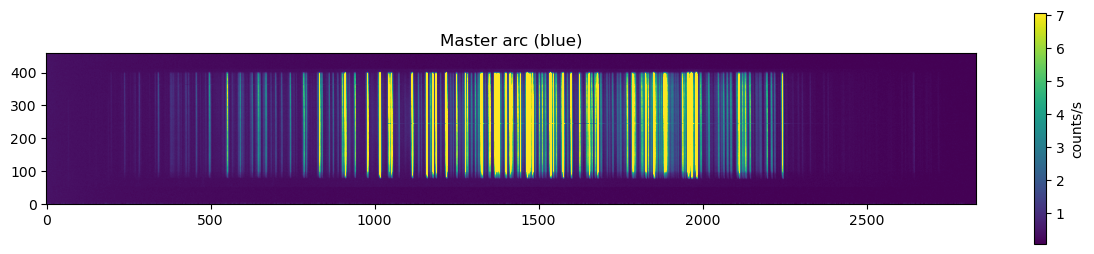

In [28]:
master_arc_blue = create_master(arcs, 'blue', master_bias_blue)
util.plot_frame(master_arc_blue.T, label='counts/s', title='Master arc (blue)', prange=(5, 95))

## Rectify frames

### Rectify blue
#### Find trace using calib star

In [112]:
master_calib_star_blue = create_master(calib_star, 'blue', master_bias_blue).T

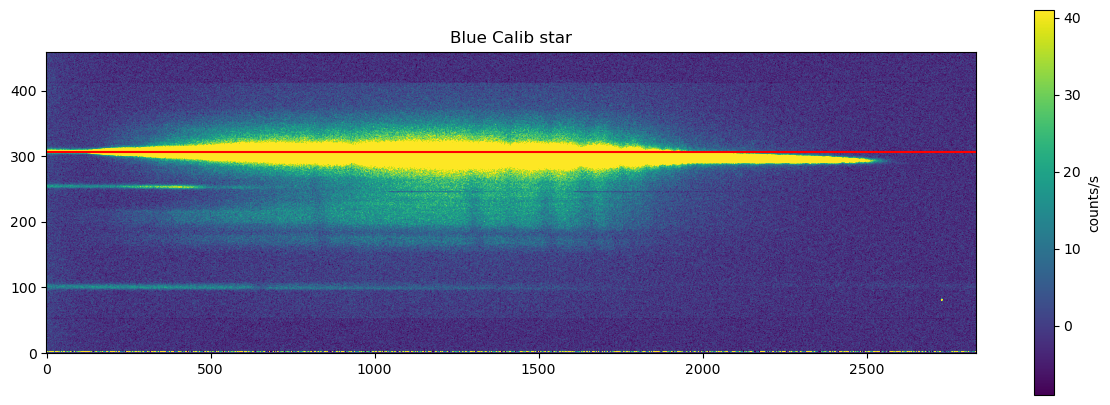

In [158]:
prange_B = (5,95)
util.plot_frame(master_calib_star_blue, figsize=(15, 5), aspect=2, label='counts/s', title='Blue Calib star', prange=prange_B)
plt.axhline(307, color='r')

In [78]:
master_calib_star_blue.shape

(460, 2835)

In [79]:
trace_x_B = np.arange(master_calib_star_blue.shape[1]) #indices for x pixels
trace_y_B = np.argmax(master_calib_star_blue, axis=0) #indices for brightest y pixels

(250.0, 350.0)

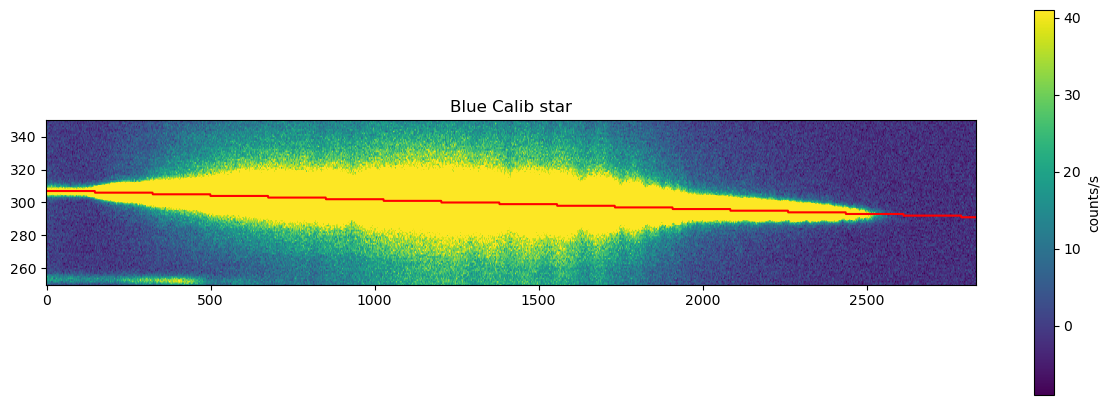

In [114]:
util.plot_frame(master_calib_star_blue, figsize=(15, 5), aspect=5, label='counts/s', title='Blue Calib star', prange=prange_B)
plt.plot(trace_x_B, trace_y_B, label='trace', color='r')
plt.ylim(250, 350)

(250.0, 350.0)

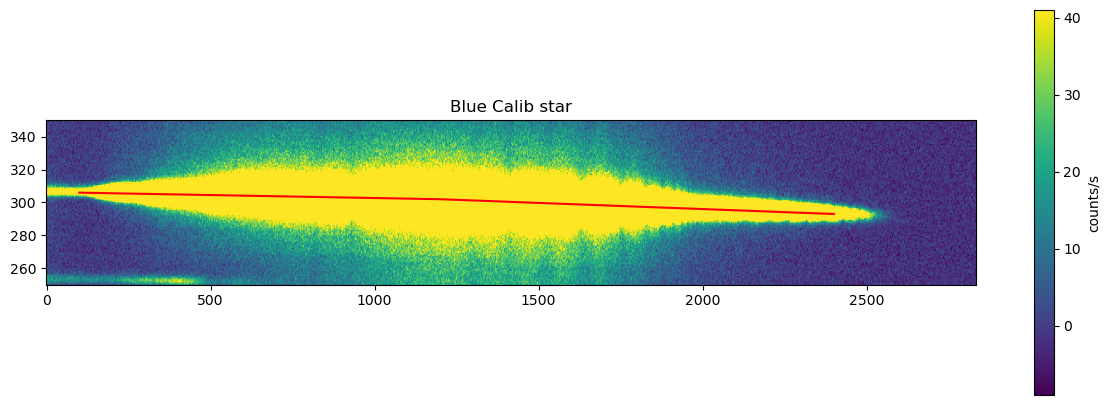

In [115]:
x_edges = [100, 1200, 2400] #0 is dead
y_edges = [np.argmax(master_calib_star_blue[:,i]) for i in x_edges]
util.plot_frame(master_calib_star_blue, figsize=(15, 5), aspect=5, label='counts/s', title='Blue Calib star', prange=prange_B)
plt.plot(x_edges, y_edges, label='trace', color='r')
plt.ylim(250, 350)

In [116]:
coefficients = np.polyfit(x_edges, y_edges, 1)
coefficients

array([-5.68010076e-03,  3.07338791e+02])

In [117]:
trace_x_B = np.arange(0, master_calib_star_blue.shape[1], 1)
trace_y_B = np.round(np.polyval(coefficients, trace_x_B)).astype(int) #y indices has to be integers
trace_x_B.shape, trace_y_B.shape

((2835,), (2835,))

(250.0, 350.0)

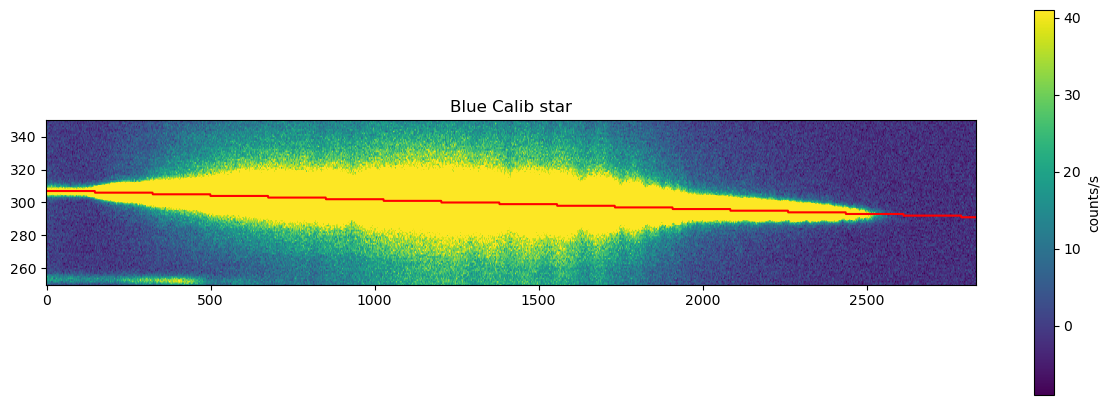

In [118]:
util.plot_frame(master_calib_star_blue, figsize=(15, 5), aspect=5, label='counts/s', title='Blue Calib star', prange=prange_B)
plt.plot(trace_x_B, trace_y_B, label='trace', color='r')
plt.ylim(250, 350)

#### Find y pixel bounds using flat

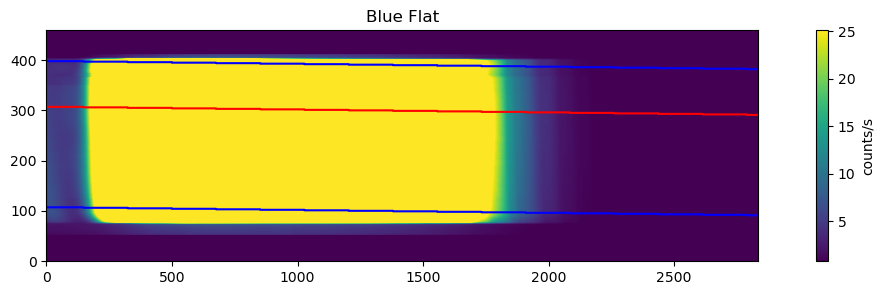

In [119]:
util.plot_frame(master_flat_blue.T, aspect=2, label='counts/s', title='Blue Flat', prange=(40,60))
plt.plot(trace_x_B, trace_y_B, color='r')

y_bound_upper_B, y_bound_lower_B = (91, 200)
plt.plot(trace_x_B, trace_y_B+y_bound_upper_B, color='b')
plt.plot(trace_x_B, trace_y_B-y_bound_lower_B, color='b')

In [120]:
master_flat_blue.T.shape

(460, 2835)

In [121]:
rectified_flat_B, rectified_calib_B, rectified_bias_B, rectified_arc_B  = [
    util.rectify_frame(frame, trace_y_B, y_bound_upper_B, y_bound_lower_B) for frame in
    [master_flat_blue.T, master_calib_star_blue, master_bias_blue.T, master_arc_blue.T]]
rectified_flat_B.shape

(292, 2835)

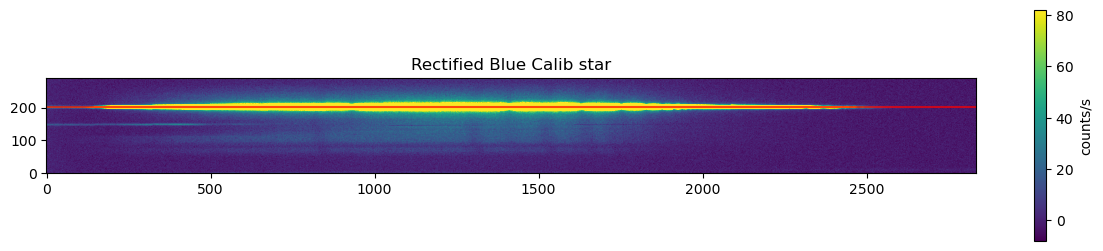

In [122]:
util.plot_frame(rectified_calib_B, label='counts/s', title='Rectified Blue Calib star', prange=prange_B)
plt.axhline(y_bound_lower_B+1, color='r', alpha=0.7)

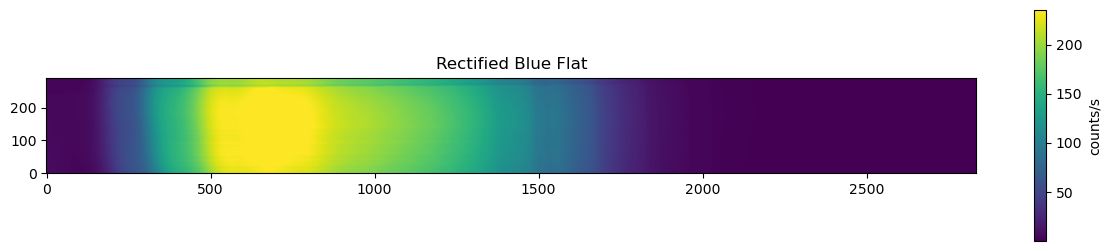

In [123]:
util.plot_frame(rectified_flat_B, label='counts/s', title='Rectified Blue Flat', prange=prange_B)

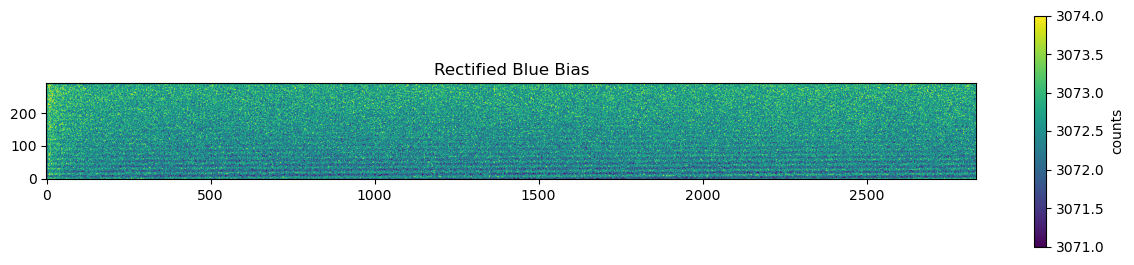

In [124]:
util.plot_frame(rectified_bias_B, label='counts', title='Rectified Blue Bias', prange=prange_B)


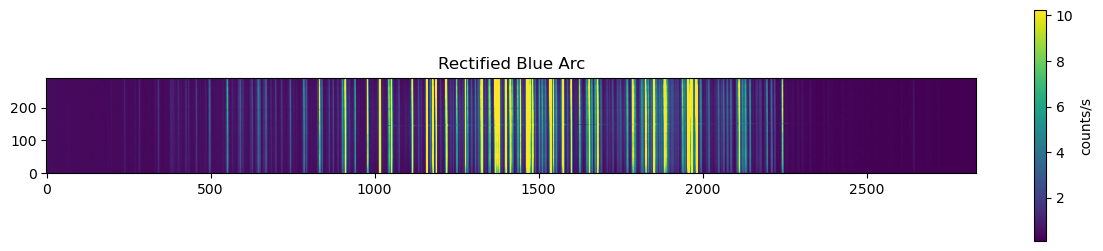

In [125]:
util.plot_frame(rectified_arc_B, label='counts/s', title='Rectified Blue Arc', prange=prange_B)


### Rectify Red
#### Find trace

In [126]:
master_calib_star_red = create_master(calib_star, 'red', master_bias_red)

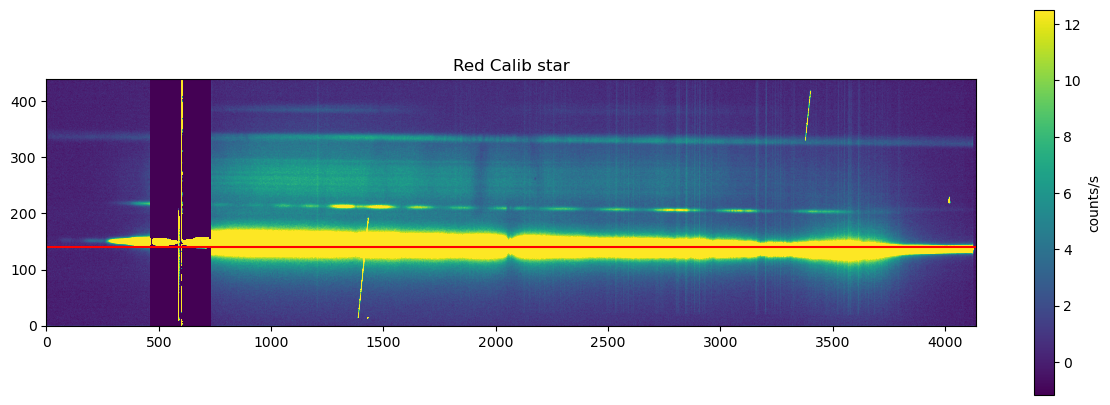

In [144]:
prange_R = (7,93)
util.plot_frame(master_calib_star_red, figsize=(15, 5), aspect=2.5, label='counts/s', title='Red Calib star', prange=prange_R)
plt.axhline(140, color='r')

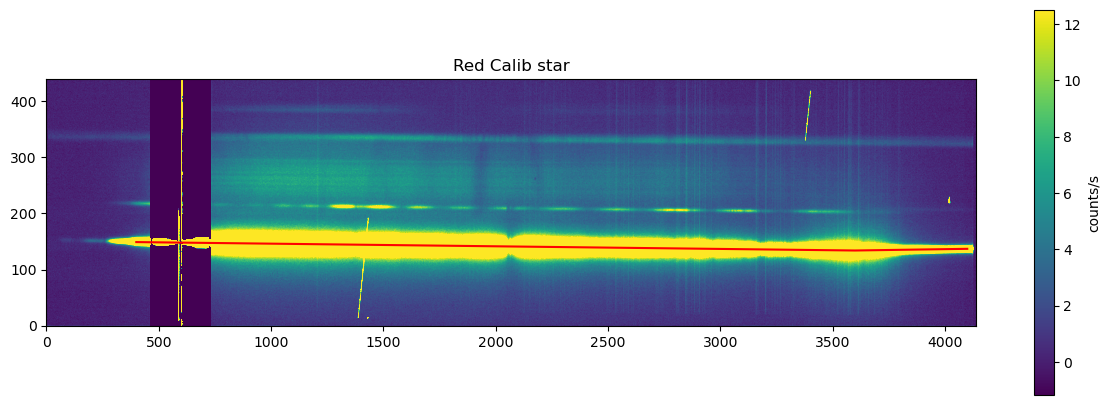

In [145]:
x_edges_R = [400, 3600, 4100]
y_edges_R = [np.argmax(master_calib_star_red[:,i]) for i in x_edges_R]
util.plot_frame(master_calib_star_red, figsize=(15, 5), aspect=2.5, label='counts/s', title='Red Calib star', prange=prange_R)
plt.plot(x_edges_R, y_edges_R, label='trace', color='r')


In [137]:
trace_x_R = np.arange(0, master_calib_star_red.shape[1], 1)
trace_y_R = np.round(np.polyval(np.polyfit(x_edges_R, y_edges_R, 1), trace_x_R)).astype(int) #y indices has to be integers
trace_x_R.shape, trace_y_R.shape

((4141,), (4141,))

#### Find y pixel bounds

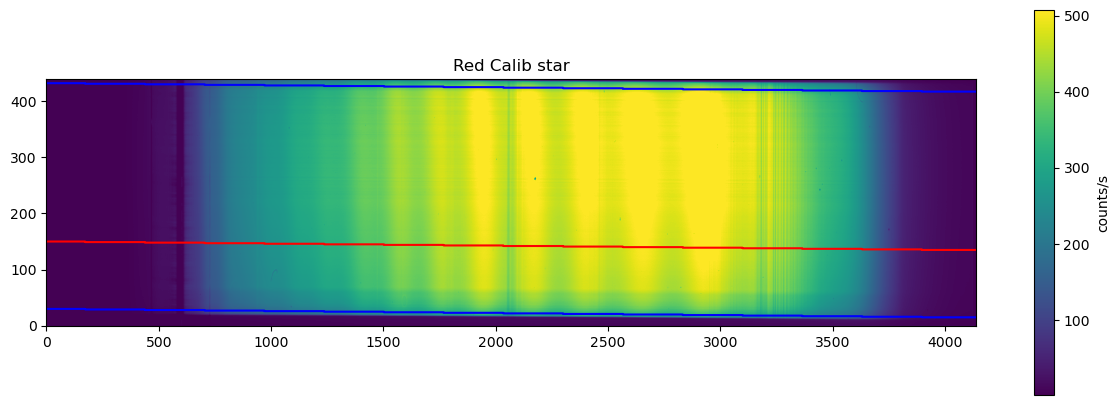

In [146]:
util.plot_frame(master_flat_red, figsize=(15, 5), aspect=2.5, label='counts/s', title='Red Calib star', prange=prange_R)
plt.plot(trace_x_R, trace_y_R, color='r')

y_bound_upper_R, y_bound_lower_R = (282, 120)
plt.plot(trace_x_R, trace_y_R+y_bound_upper_R, color='b')
plt.plot(trace_x_R, trace_y_R-y_bound_lower_R, color='b')

In [140]:
master_flat_red.shape

(440, 4141)

In [141]:
rectified_flat_R, rectified_calib_R, rectified_bias_R, rectified_arc_R  = [
    util.rectify_frame(frame, trace_y_R, y_bound_upper_R, y_bound_lower_R) for frame in
    [master_flat_red, master_calib_star_red, master_bias_red, master_arc_red]]
rectified_flat_R.shape

(403, 4141)

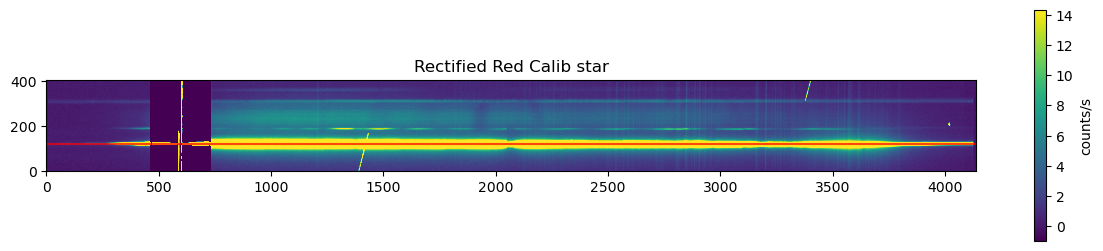

In [147]:
util.plot_frame(rectified_calib_R, label='counts/s', title='Rectified Red Calib star', prange=prange_R)
plt.axhline(y_bound_lower_R, color='r', alpha=0.7)

In [148]:
util.plot_frame(rectified_flat_R, label='counts/s', title='Rectified Red Flat', prange=prange_R)

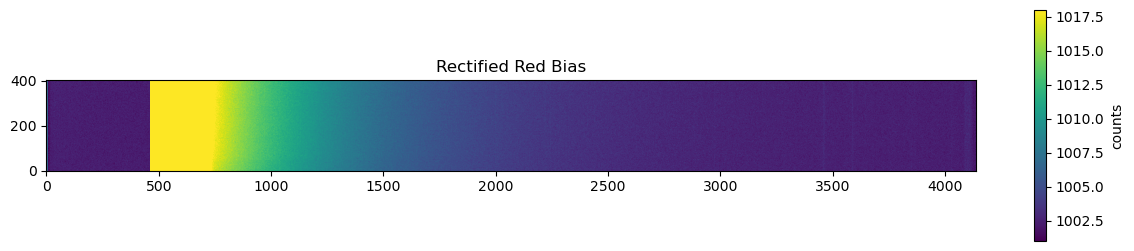

In [149]:
util.plot_frame(rectified_bias_R, label='counts', title='Rectified Red Bias', prange=prange_R)

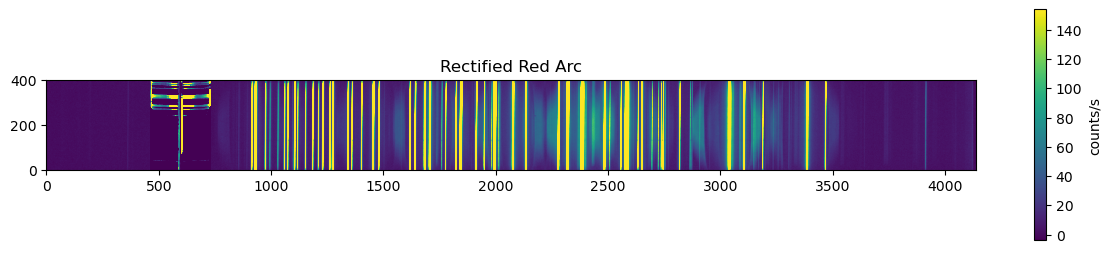

In [152]:
util.plot_frame(rectified_arc_R, label='counts/s', title='Rectified Red Arc', prange=prange_R)


In [153]:
science = hdr_df[(hdr_df['IMGTYPE']=='object') & (hdr_df['OBJECT'] != 'HD 158261')]
science

OBJECT IMGTYPE  GAIN  EXPTIME          UT           RA  \
filename                                                              
red0022        none  object  2.80    600.0  03:49:20.9  16:59:05.87   
red0023   SN2024eze  object  2.80    600.0  04:01:01.1  16:59:05.80   
red0024   SN2024eze  object  2.80    600.0  04:11:24.3  16:59:05.90   
red0025   SN2024eze  object  2.80    600.0  04:21:47.4  16:59:05.93   
blue0022  SN2024eze  object  0.72   1200.0  03:50:23.6  16:59:05.82   
blue0023  SN2024eze  object  0.72   1200.0  04:10:54.6  16:59:05.86   

                  DEC AIRMASS   GRATING  
filename                                 
red0022   +42:52:25.9   2.817  316/7500  
red0023   +42:52:26.6   2.590  316/7500  
red0024   +42:52:26.3   2.417  316/7500  
red0025   +42:52:26.6   2.266  316/7500  
blue0022  +42:52:26.2   2.795  600/4000  
blue0023  +42:52:26.6   2.425  600/4000

In [156]:
science_master_red = create_master(science, 'red', master_bias_red)
science_master_blue = create_master(science, 'blue', master_bias_blue)

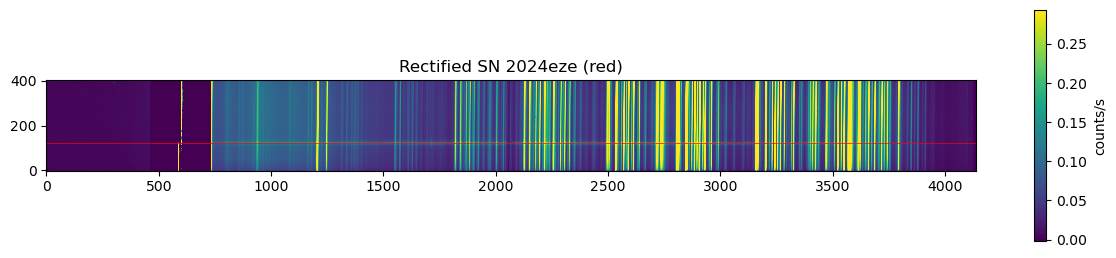

In [157]:
science_red_rectified = util.rectify_frame(science_master_red, trace_y_R, y_bound_upper_R, y_bound_lower_R)
util.plot_frame2(science_red_rectified, label='counts/s', title='Rectified SN 2024eze (red)', prange=prange_R)
plt.axhline(y_bound_lower_R, color='r', linewidth=0.5)

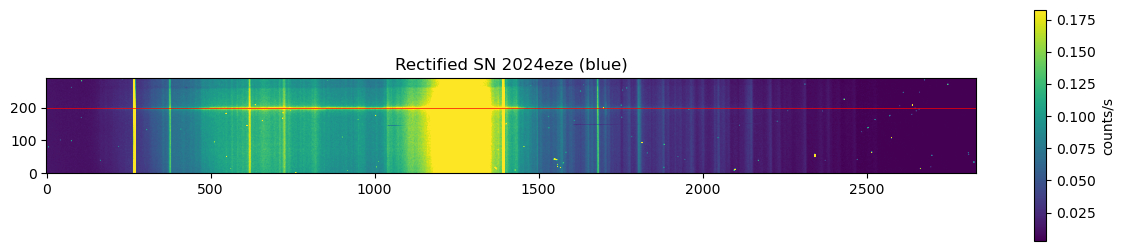

In [161]:
science_blue_rectified = util.rectify_frame(science_master_blue.T, trace_y_B, y_bound_upper_B, y_bound_lower_B)
util.plot_frame2(science_blue_rectified, label='counts/s', title='Rectified SN 2024eze (blue)', prange=prange_R)
plt.axhline(y_bound_lower_B, color='r', linewidth=0.5)

Text(0, 0.5, 'counts/s')

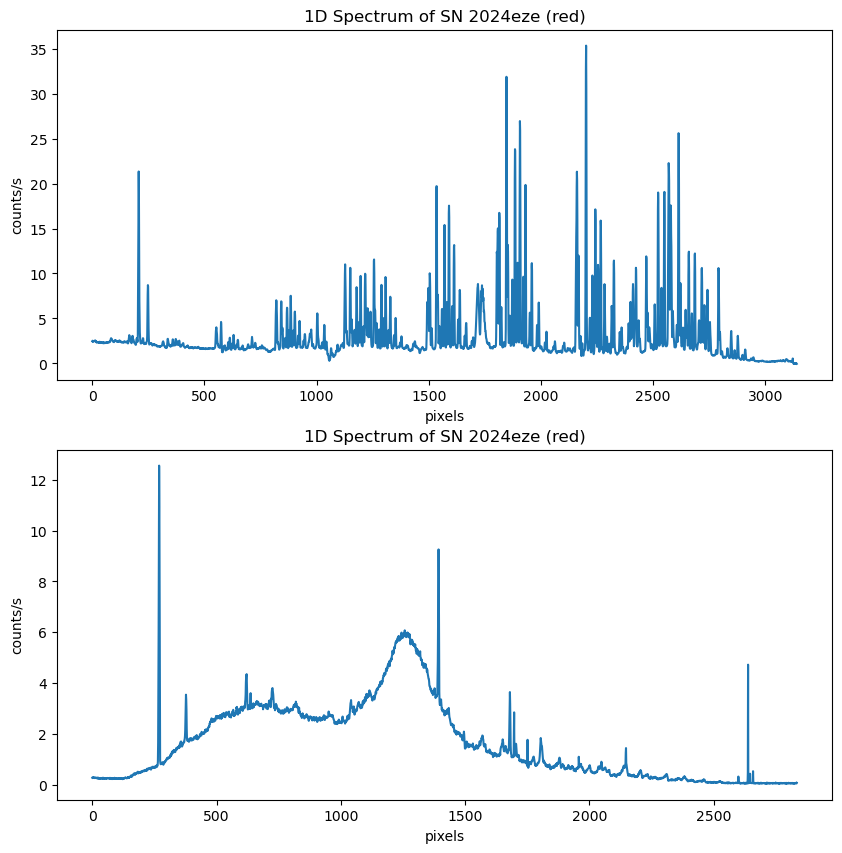

In [162]:
ap=10
fig,ax = plt.subplots(2,1, figsize=(10,10))
sn_spectrum_1d_red = np.sum(science_red_rectified[y_bound_lower_R-ap: y_bound_lower_R+ap,:],axis=0)
ax[0].plot(sn_spectrum_1d_red[1000:])
ax[0].set_title("1D Spectrum of SN 2024eze (red)")
ax[0].set_xlabel("pixels")
ax[0].set_ylabel("counts/s")
#TODO: background subtraction
sn_spectrum_1d_blue = np.sum(science_blue_rectified[y_bound_lower_B-ap: y_bound_lower_B+ap,:],axis=0)
ax[1].plot(sn_spectrum_1d_blue)
ax[1].set_title("1D Spectrum of SN 2024eze (red)")
ax[1].set_xlabel("pixels")
ax[1].set_ylabel("counts/s")

## Reduce frames 
- subtract bias - already subtracted in master frames
- divide by exptime - already done
- divide by normalised flat

## Wavelength calibration
- use arc to derive a px to wvl solution

In [61]:
# identifying arcs using calibration spectrum
hdul_fear = fits.open('scidoc2214.fits')

data_fear = hdul_fear['PRIMARY'].data.astype(float)
n_px = len(data_fear)
hdr_fear = hdul_fear[0].header

spectrum_range = [3000, 10900]  # angstroms
spectral_resolution = np.diff(spectrum_range) / n_px  # Å/pix
spectral_resolution

array([0.19894734])

array([4151.37009134, 4886.64577639, 4926.14840989, 4931.94212948,
       4954.59030602, 5255.33702247, 5324.86165744, 5745.16967798,
       6042.22948197, 6355.09033936, 6482.02546836, 6541.01606774,
       6634.24228282, 6746.42976198, 7059.81732115, 7177.7985199 ,
       7229.94199613, 7356.87712514, 7538.58923928, 7638.66257751,
       7941.51610107, 8967.53116874])

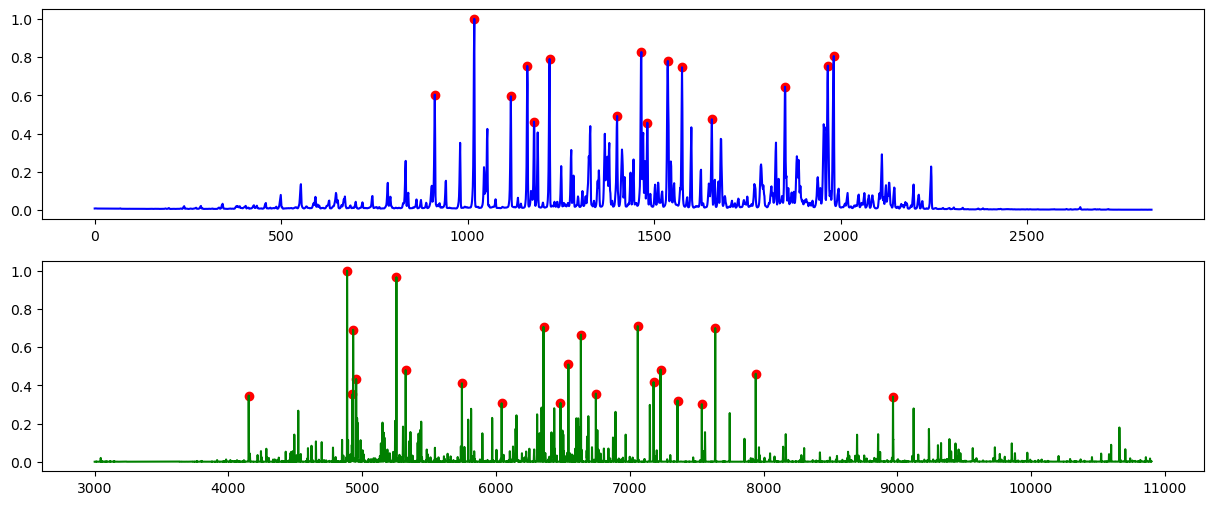

In [62]:
from util import plot_frame2
from scipy.signal import find_peaks

arc_aperture =100
blue_center = int(blue_shape[1] / 2)
b = master_arc_blue[:, (blue_center - arc_aperture):(blue_center + arc_aperture)]
#b = master_arc_blue

#fig,ax = plot_frame2(b.T, label='counts', title='Master arc (red)', prange=(10, 90))

a = np.sum(b, axis=1)
a = a / np.max(a)
x, y = find_peaks(a, distance=10, height=0.45)
y = y['peak_heights']

fig, ax = plt.subplots(2, 1, figsize=(15,6))
ax[0].plot(a.T, c='b')
ax[0].scatter(x,y, c='r', label='peaks')


hdul = fits.open('scidoc2214.fits')
spectrum = hdul[0].data.astype(float)[:15000]
spectrum = spectrum / np.max(spectrum)
x2, y2 = find_peaks(spectrum, distance=10, height=0.3)
y2 = y2['peak_heights']
wvls = np.linspace(3000, 10900, spectrum.shape[0])
ax[1].plot(wvls, spectrum, c='g')
ax[1].scatter(wvls[x2],y2, c='r', label='peaks')

#matched = [None, None, None, 7941, 7638, None, 7177, 7057, None, ] #TODO
wvls[x2]

## Airmass correction 
- use airmass extinction to find zero airmass flux for calib star 

## Flux calibration
- Source and BG extraction on calib star
- Derive counts to photons conversion factor

## Rectify, reduce, airmass-correct science data
- All above steps on science data to extract spectrum from images